In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

import warnings
from itertools import product

import scipy.stats as scs

In [2]:
pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 221.0 kB/s eta 0:00:00
     ------------------------------------ 233.9/233.9 kB 340.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt


In [5]:
from dateutil.relativedelta import relativedelta
from scipy.optimize import optimize
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"


In [7]:
ads = pd.read_csv(DATA_PATH + "ads.csv", index_col=["Time"], parse_dates=["Time"])
currency = pd.read_csv(
    DATA_PATH + "currency.csv", index_col=["Time"], parse_dates=["Time"]
)

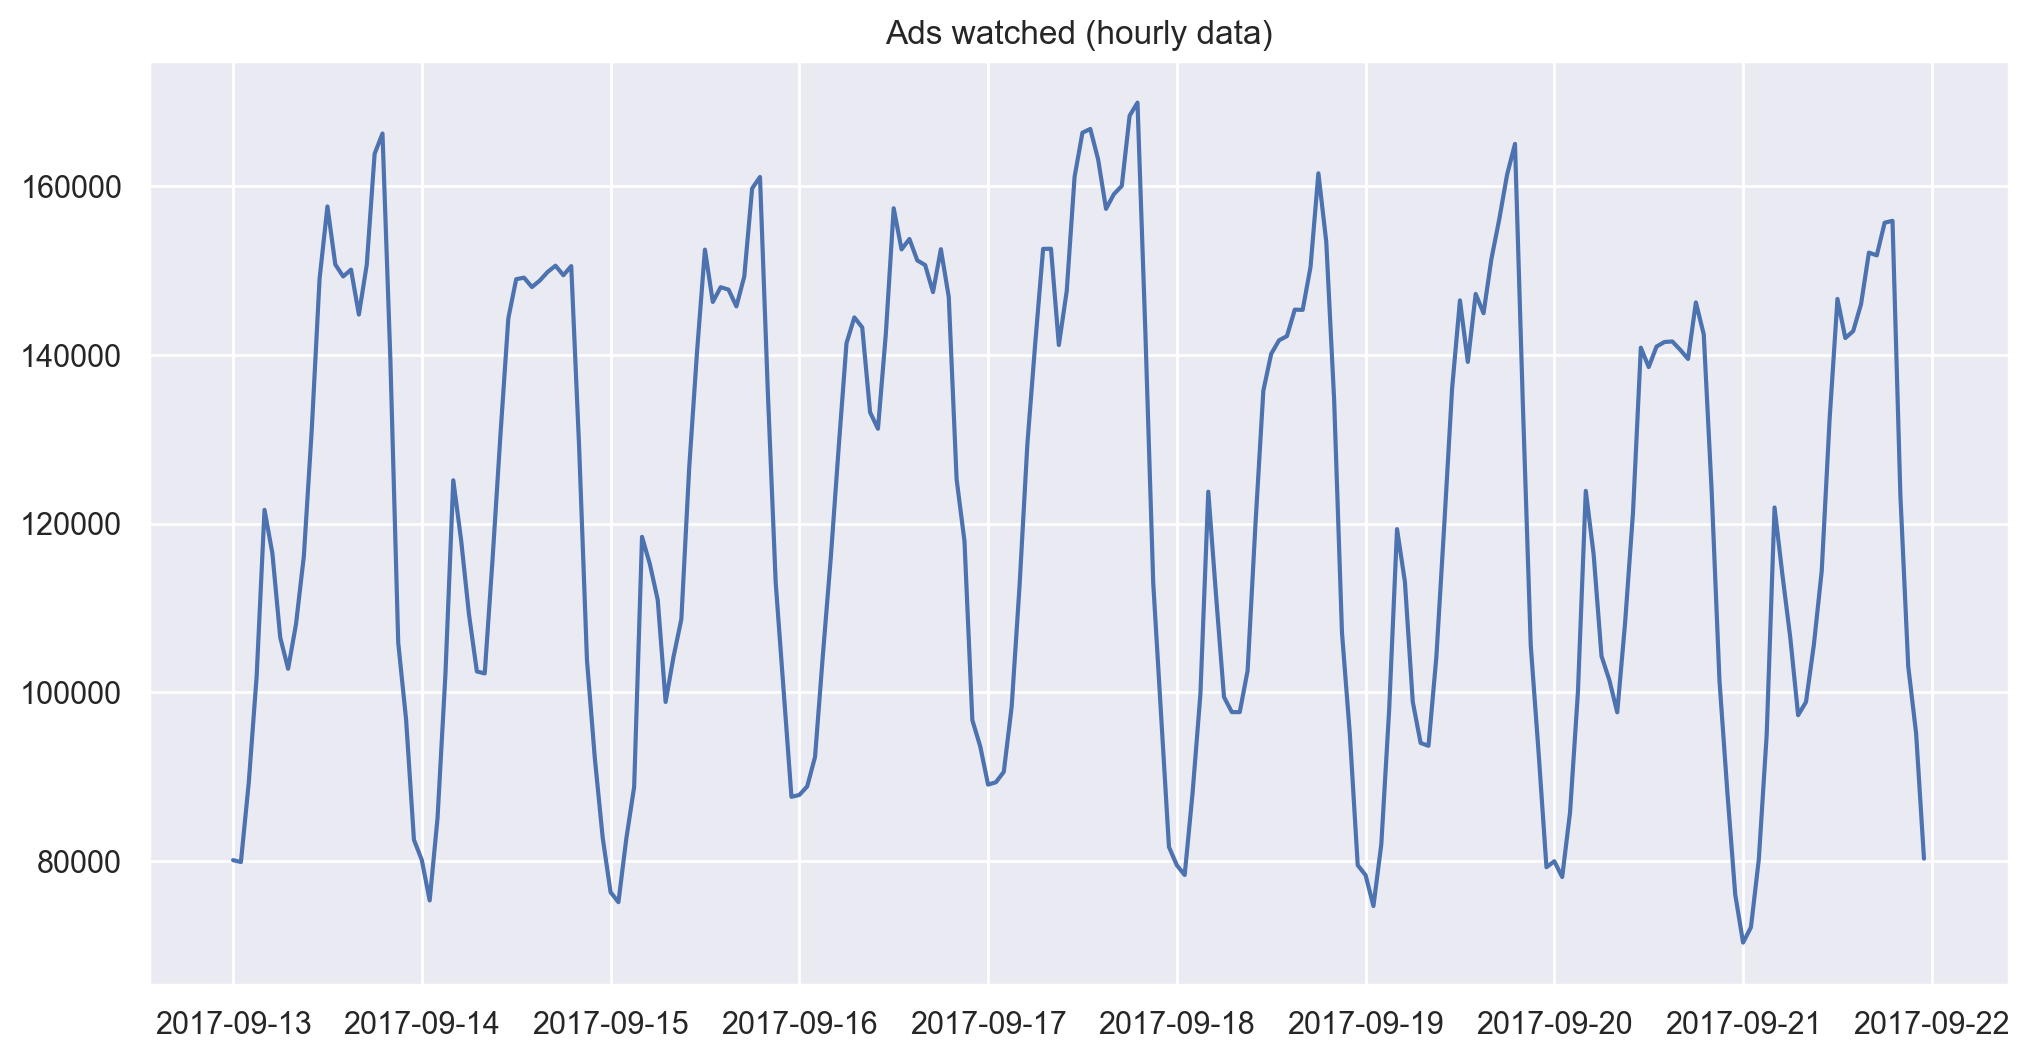

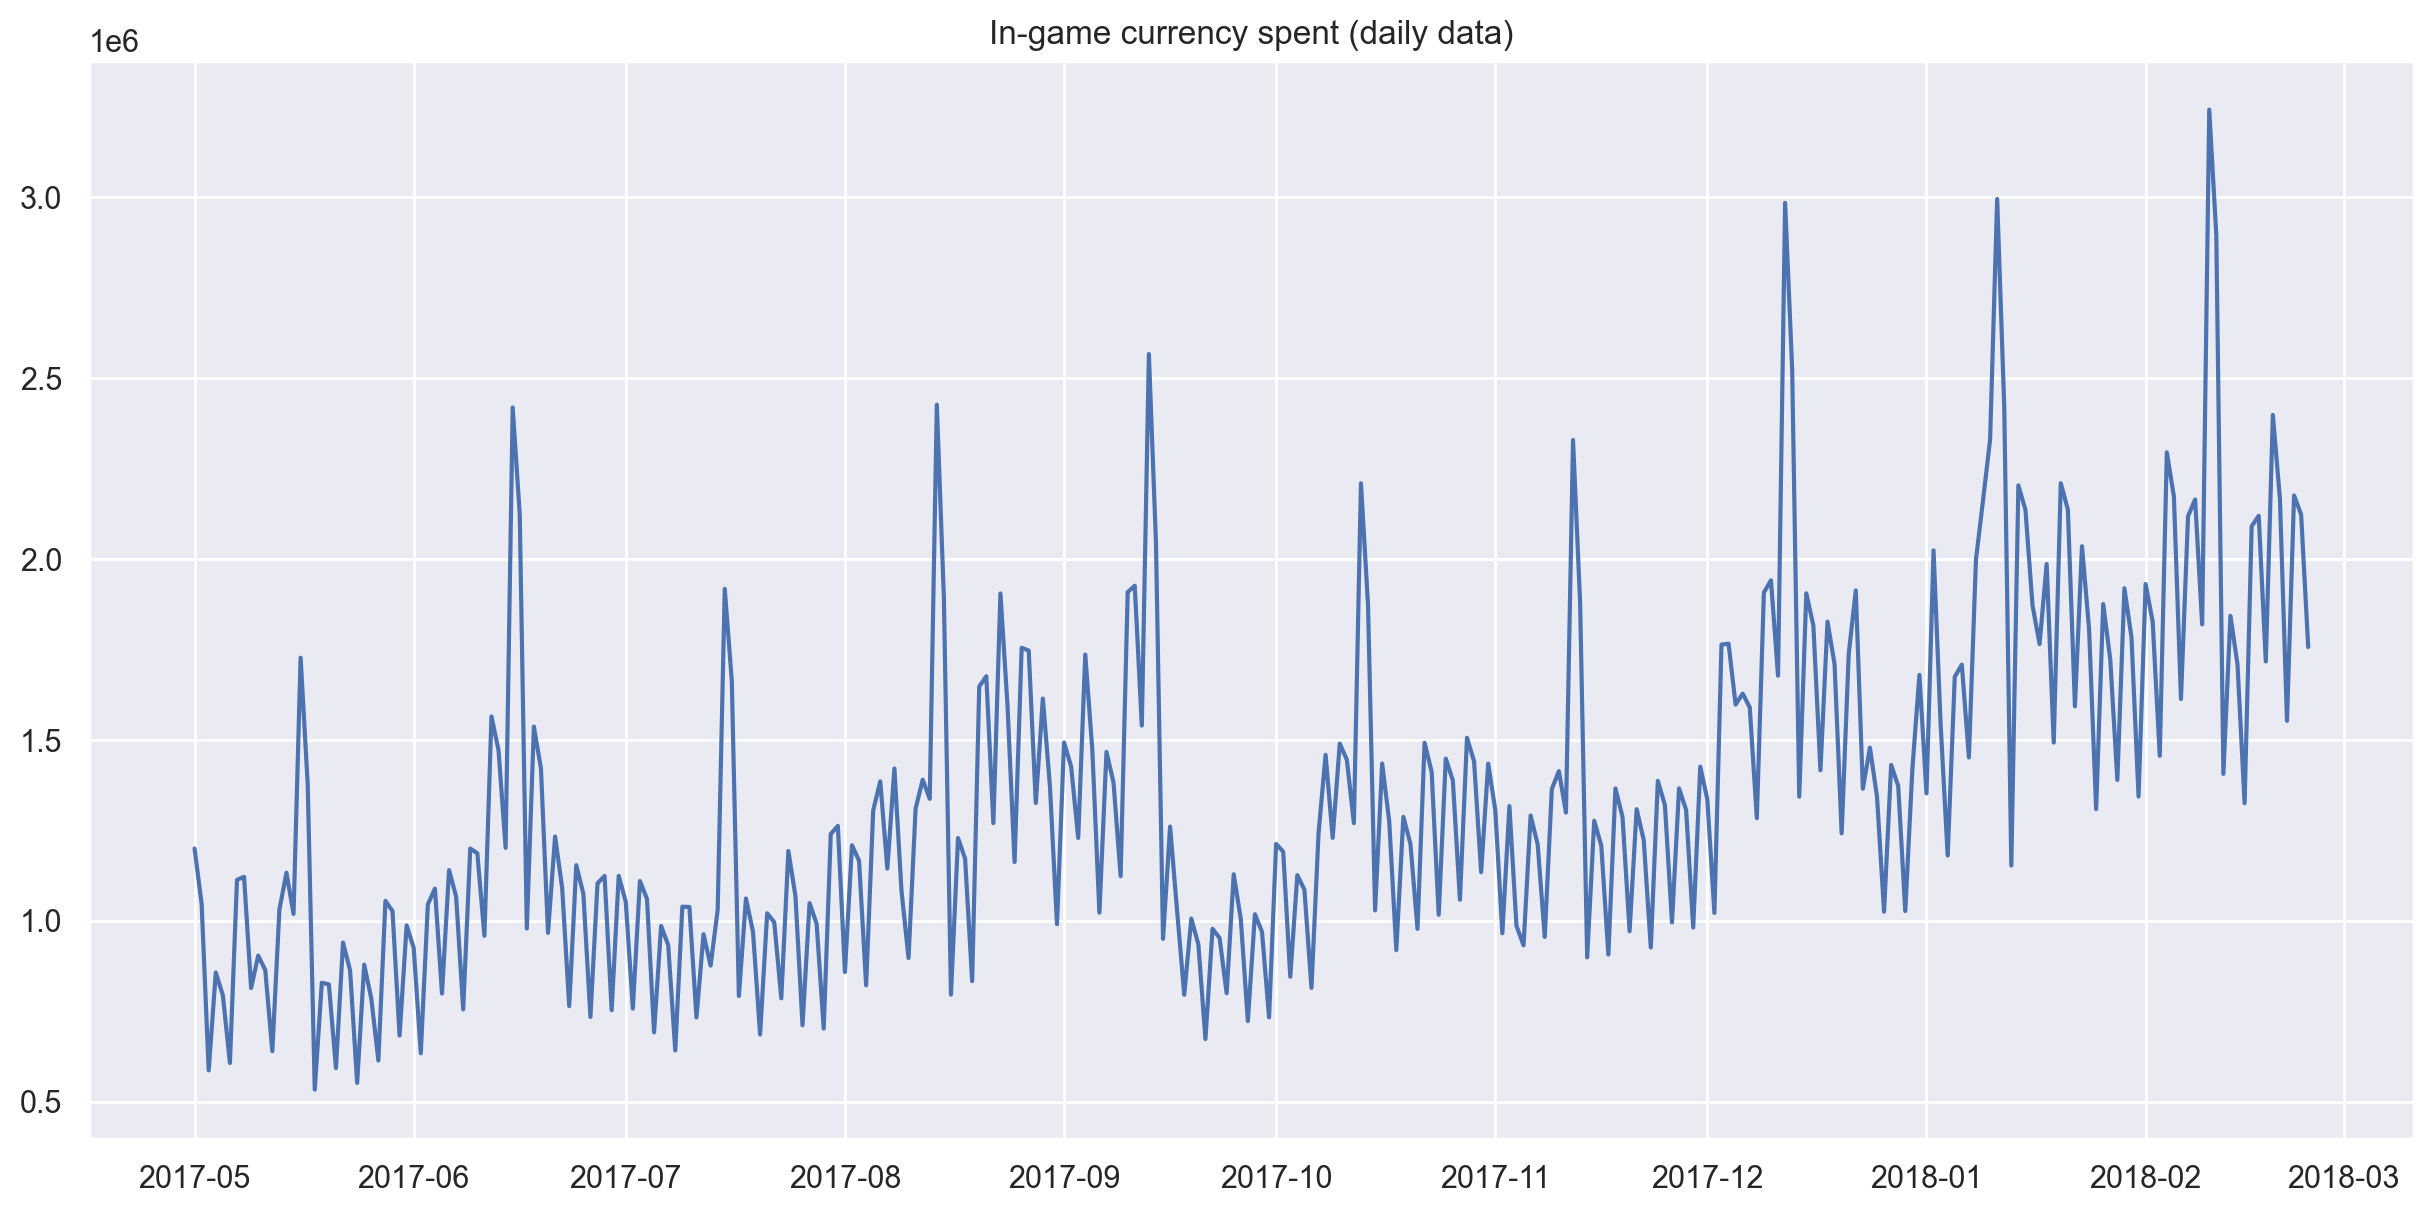

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(ads.Ads)
plt.title("Ads watched (hourly data)")
plt.grid(True)

plt.figure(figsize=(15, 7))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title("In-game currency spent (daily data)")
plt.grid(True)
plt.show()

In [20]:
my_series = pd.Series([17, 9, 28, 15, 23, 7, 14])
print(my_series.rolling(2).mean())

0     NaN
1    13.0
2    18.5
3    21.5
4    19.0
5    15.0
6    10.5
dtype: float64


In [1]:
pip install prophet

     -------------------------------------- 13.3/13.3 MB 534.6 kB/s eta 0:00:00
     -------------------------------------- 93.0/93.0 kB 252.4 kB/s eta 0:00:00
     ------------------------------------ 869.8/869.8 kB 369.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

     ---------------------------------------- 15.6/15.6 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)

5.18.0


In [20]:
def plotly_df(df, title="", width=800, height=500):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode="lines")
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)

    # in a Jupyter Notebook, the following should work
    # iplot(fig, show_link=False)

    # in a Jupyter Book, we save a plot offline and then render it with IFrame
    # plot_path = f"../../_static/plotly_htmls/{title}.html".replace(" ", "_")
    plot(fig, show_link=False, auto_open=False)
    # display(IFrame(width=width, height=height))

In [6]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [7]:
df = pd.read_csv(DATA_PATH + "wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [8]:
df.shape


(383, 7)

In [9]:
df.date = pd.to_datetime(df.date)

In [32]:
df2 = df.set_index("date")[["count"]]

In [34]:
df2.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-16', '2016-01-17', '2016-01-18',
               '2016-01-19', '2016-01-20'],
              dtype='datetime64[ns]', name='date', length=383, freq=None)

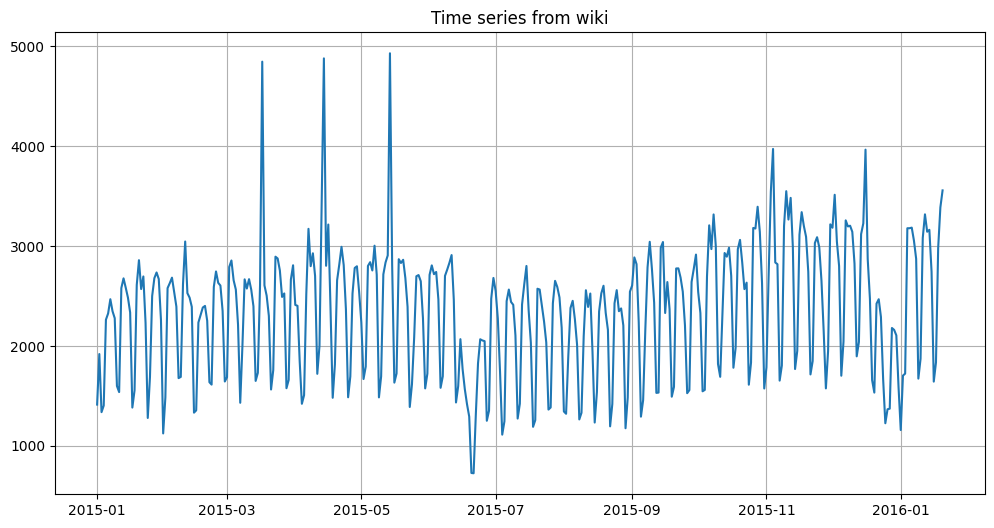

In [35]:
from matplotlib.pyplot import plot, figure, title, grid, show
figure(figsize=(12, 6))
plot(df2)
title('Time series from wiki')
grid(True)
show()

In [37]:
from prophet import Prophet
predictions = 30
df2 = df[["date", "count"]]
df2.columns = ["ds", "y"]
df2.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [38]:
df2.ds = pd.to_datetime(df2.ds)

In [110]:
model = Prophet()
model.fit(df2[:-predictions])

21:12:14 - cmdstanpy - INFO - Chain [1] start processing
21:12:15 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
future = model.make_future_dataframe(periods=30)
future.head()

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [113]:
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [120]:
df2.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [114]:
forecast = model.predict(future)

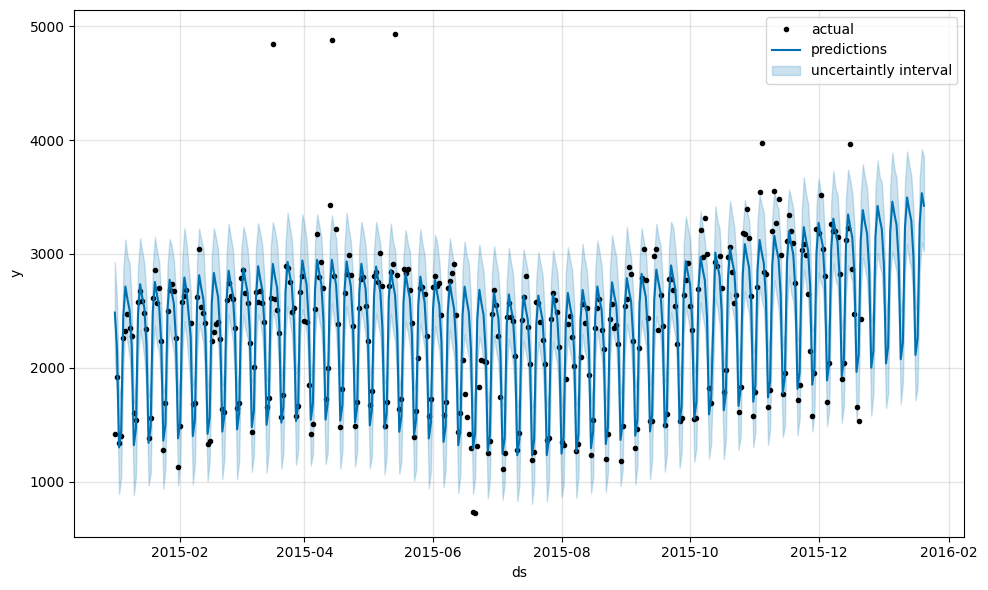

In [121]:
from matplotlib.pyplot import legend 
fig = model.plot(forecast)
legend(['actual', 'predictions', 'uncertaintly interval'])
show()

In [266]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
363,2016-01-01,2895.129959,2487.276680,3301.845751,2890.852973,2898.523843,7.025891,7.025891,7.025891,7.025891,7.025891,7.025891,0.0,0.0,0.0,2902.155850
364,2016-01-02,2900.461362,1645.541571,2426.998249,2895.245955,2904.827842,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,2037.915398
365,2016-01-03,2905.792764,1769.499316,2643.917946,2899.720441,2911.202984,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,2184.267025
366,2016-01-04,2911.124167,2813.451444,3596.850574,2904.009452,2917.474626,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,3192.500021
367,2016-01-05,2916.455569,3022.887830,3888.085229,2908.473281,2923.656229,542.213022,542.213022,542.213022,542.213022,542.213022,542.213022,0.0,0.0,0.0,3458.668591
368,2016-01-06,2921.786972,2931.500837,3746.144003,2912.693302,2929.940208,426.073193,426.073193,426.073193,426.073193,426.073193,426.073193,0.0,0.0,0.0,3347.860165
369,2016-01-07,2927.118375,2846.722128,3664.129369,2917.113894,2936.311416,327.383743,327.383743,327.383743,327.383743,327.383743,327.383743,0.0,0.0,0.0,3254.502118
370,2016-01-08,2932.449777,2536.740757,3317.528132,2921.322035,2942.661484,7.025891,7.025891,7.025891,7.025891,7.025891,7.025891,0.0,0.0,0.0,2939.475668
371,2016-01-09,2937.781180,1679.866432,2490.110321,2925.618348,2949.273551,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,2075.235216
372,2016-01-10,2943.112582,1868.496872,2637.429972,2929.917181,2955.812583,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,2221.586843


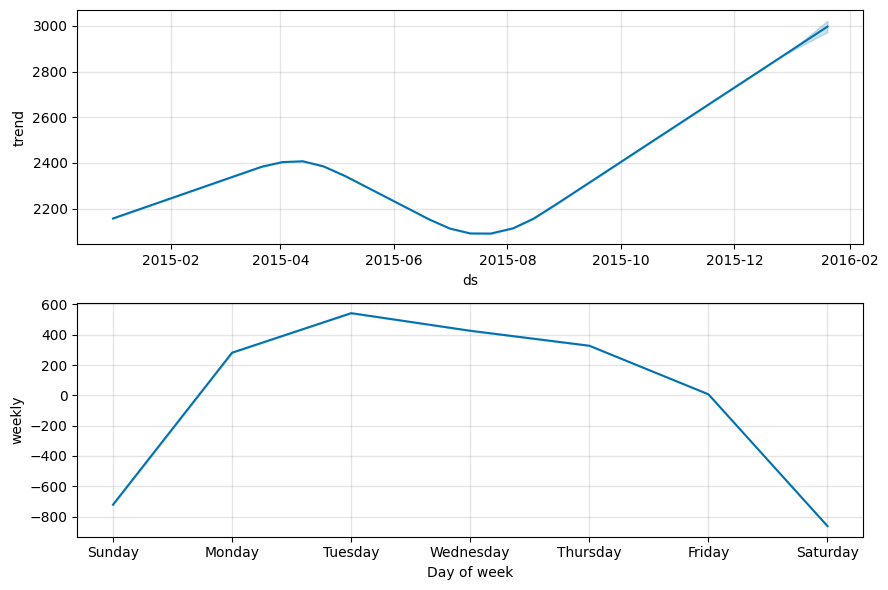

In [122]:
fig = model.plot_components(forecast)
show()

In [126]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-3.0.6-cp310-cp310-win_amd64.whl (2.8 MB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.8.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ephem-4.1.5-cp310-cp310-win_amd64.whl (1.4 MB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.9.1-cp310-cp310-win_amd64.whl (364 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl 

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\nuke\AppData\Local\Temp\pip-install-x17k7j53\pystan_4136244293be430fa2787afcd70587e7\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.

       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [119]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.

       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds"))

# forecast = forecast[forecast['ds'] < "2016-02-01"]
cmp_df = make_comparison_dataframe(df2, forecast)
cmp_df.tail(5)
# print(cmp_df)

for err_name, err_value in calculate_forecast_errors(cmp_df, predictions).items():
    print(err_name, err_value)

MAPE 34.35047504217825
MAE 596.7308244328995


In [102]:
forecast = forecast[forecast['ds'] < "2016-02-01"]
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
389,2016-01-27,2630.927515,2605.328200,3528.998012,2630.038909,2632.345280,429.843648,429.843648,429.843648,429.843648,429.843648,429.843648,0.0,0.0,0.0,3060.771164
390,2016-01-28,2632.559006,2485.197166,3413.636460,2631.194241,2634.413766,306.646853,306.646853,306.646853,306.646853,306.646853,306.646853,0.0,0.0,0.0,2939.205860
391,2016-01-29,2634.190497,2101.158383,3095.229184,2632.316234,2636.673263,-15.950076,-15.950076,-15.950076,-15.950076,-15.950076,-15.950076,0.0,0.0,0.0,2618.240421
392,2016-01-30,2635.821988,1351.448519,2250.855209,2633.328394,2638.785685,-850.194383,-850.194383,-850.194383,-850.194383,-850.194383,-850.194383,0.0,0.0,0.0,1785.627605
393,2016-01-31,2637.453479,1443.115343,2374.204707,2634.396012,2640.972556,-711.267975,-711.267975,-711.267975,-711.267975,-711.267975,-711.267975,0.0,0.0,0.0,1926.185505


In [189]:
from prophet.diagnostics import cross_validation, performance_metrics
# test period
horizon = '50 days'

# itraining period (optional. default is 3x of horizon)
initial = '10 days'  

# spacing between cutoff dates (optional. default is 0.5x of horizon)
period = '50 days' 

df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon, parallel='processes')

In [190]:
df_metrics = performance_metrics(df_cv)

In [191]:
df_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,94597.624106,307.567268,235.429358,0.094149,0.081231,0.097905,0.867816
1,6 days,96881.403197,311.257776,244.516383,0.095764,0.089956,0.098223,0.873563
2,7 days,77793.973942,278.915711,220.493329,0.089899,0.084076,0.091877,0.936782
3,8 days,47210.476816,217.279720,185.570859,0.081923,0.082037,0.084453,0.965517
4,9 days,56822.095436,238.373856,205.826593,0.091067,0.098575,0.093823,0.965517
5,10 days,53053.491129,230.333435,200.356025,0.094420,0.089956,0.095807,0.971264
6,11 days,67640.143964,260.077188,213.071155,0.101277,0.101555,0.100859,0.931034
7,12 days,138397.035791,372.017521,277.109500,0.132010,0.109077,0.124448,0.827586
8,13 days,195950.989009,442.663517,320.203344,0.155509,0.102598,0.138306,0.758621
9,14 days,254893.260646,504.869548,344.852413,0.180351,0.100006,0.152240,0.724138


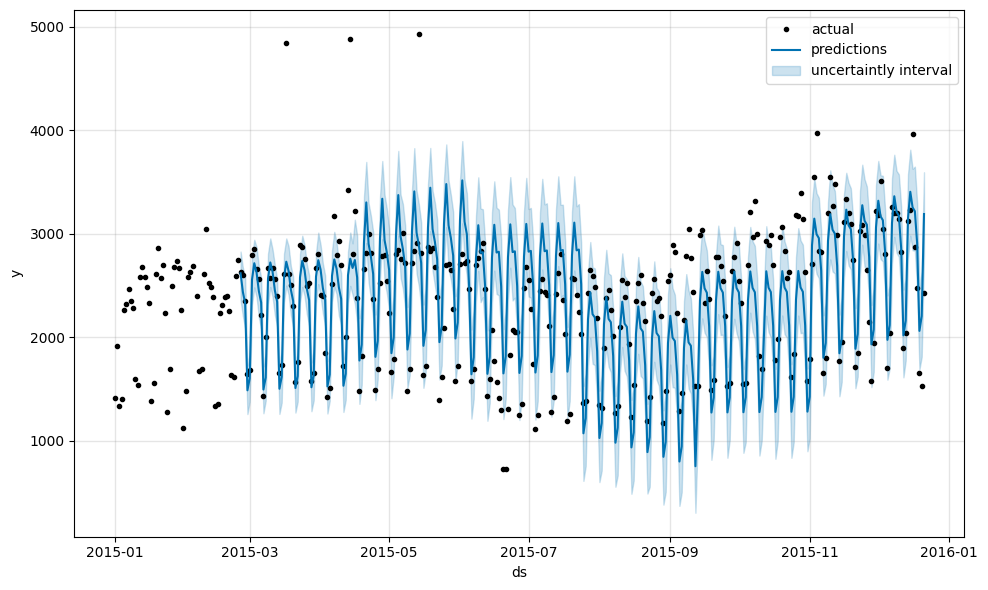

In [192]:
fig = model.plot(df_cv)
legend(['actual', 'predictions', 'uncertaintly interval'])
show()

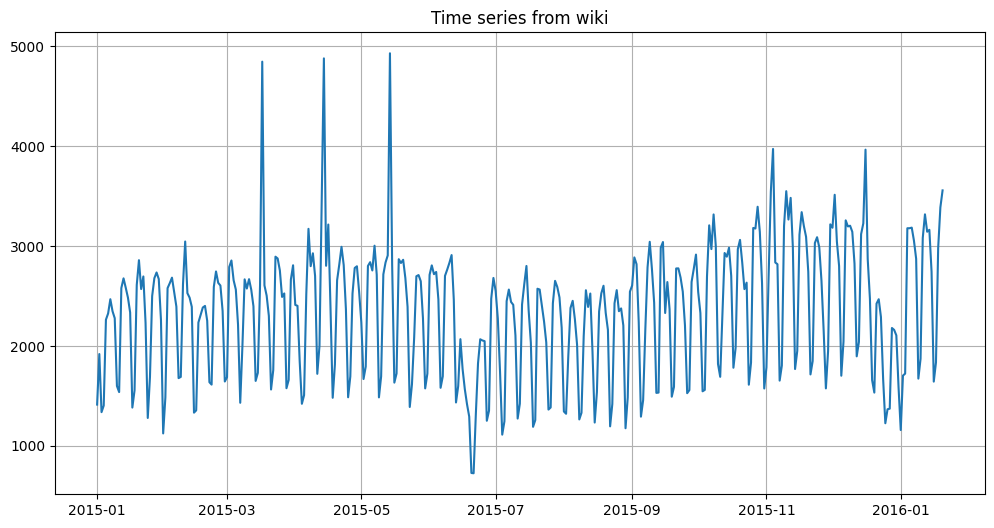

In [195]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
figure(figsize=(12, 6))
df2 = df.set_index("date")[["count"]]
plot(df2)
title('Time series from wiki')
grid(True)
show()

Test stationarity for original series
-------------------------------------
ADF Statistic: -2.534117843418305, p-value: 0.10739219627612018
KPSS Statistic: 0.7635389577271812, p-value: 0.01

Test stationarity for differenced series (order=1)
--------------------------------------------------
ADF Statistic: -8.99860207633138, p-value: 6.590537560851531e-15
KPSS Statistic: 0.16031499910950012, p-value: 0.1

Test stationarity for differenced series (order=2)
--------------------------------------------------
ADF Statistic: -8.733215826403475, p-value: 3.15049104179563e-14
KPSS Statistic: 0.29922721375526395, p-value: 0.1


C:\Users\nuke\AppData\Local\Temp\ipykernel_15584\1472369703.py:8: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\nuke\AppData\Local\Temp\ipykernel_15584\1472369703.py:16: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\nuke\AppData\Local\Temp\ipykernel_15584\1472369703.py:23: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




<Axes: title={'center': 'Differenced order 2'}, xlabel='date'>

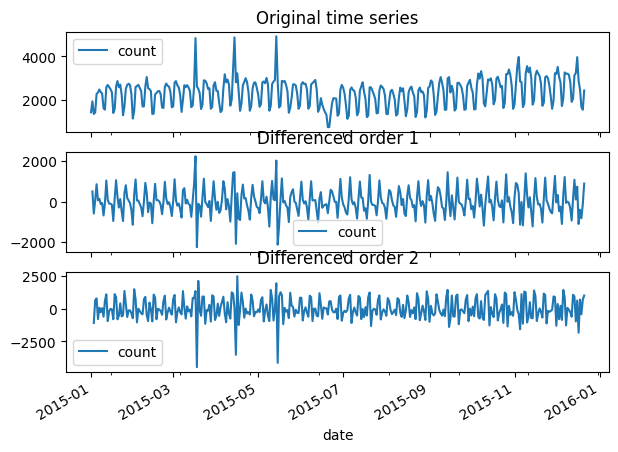

In [203]:
from statsmodels.tsa.stattools import adfuller, kpss
from matplotlib.pyplot import subplots
data_diff1 = df2[:-30].diff().dropna()
data_diff2 = data_diff1.diff().dropna()
print('Test stationarity for original series')
print('-------------------------------------')
adfuller_res = adfuller(df2[:-30])
kpss_res = kpss(df2[:-30])
print(f'ADF Statistic: {adfuller_res[0]}, p-value: {adfuller_res[1]}')
print(f'KPSS Statistic: {kpss_res[0]}, p-value: {kpss_res[1]}')


print('\nTest stationarity for differenced series (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(data_diff1)
kpss_result = kpss(df2[:-30].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest stationarity for differenced series (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(data_diff2)
kpss_result = kpss(df2[:-30].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")


fig, axs = subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)
df2[:-30].plot(ax=axs[0], title='Original time series')
data_diff1.plot(ax=axs[1], title='Differenced order 1')
data_diff2.plot(ax=axs[2], title='Differenced order 2')

Text(0.5, 1.0, 'Autocorrelation differenced series (order=3)')

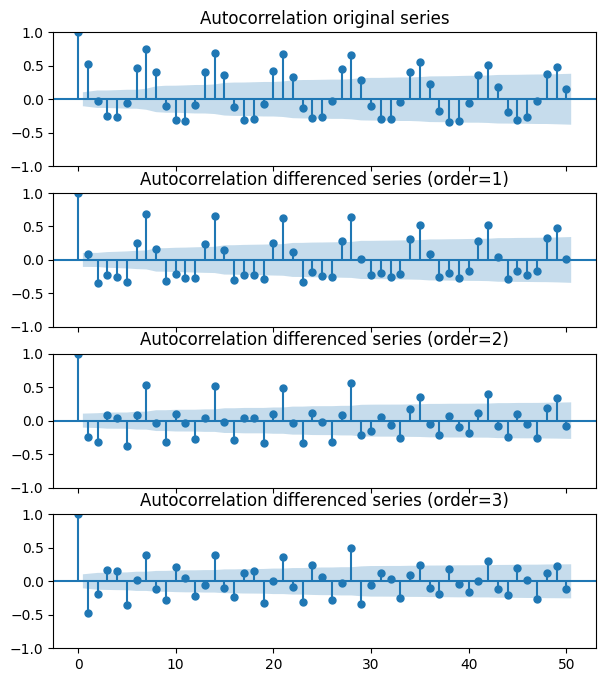

In [211]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

data = df2[:-30]
# Autocorrelation plot for original and differenced series
# ==============================================================================
fig, axs = subplots(nrows=4, ncols=1, figsize=(7, 8), sharex=True)
plot_acf(data, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelation original series')
plot_acf(data_diff1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelation differenced series (order=1)')
plot_acf(data_diff2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Autocorrelation differenced series (order=2)')
plot_acf(data_diff2.diff().dropna(), ax=axs[3], lags=50, alpha=0.05)
axs[3].set_title('Autocorrelation differenced series (order=3)')

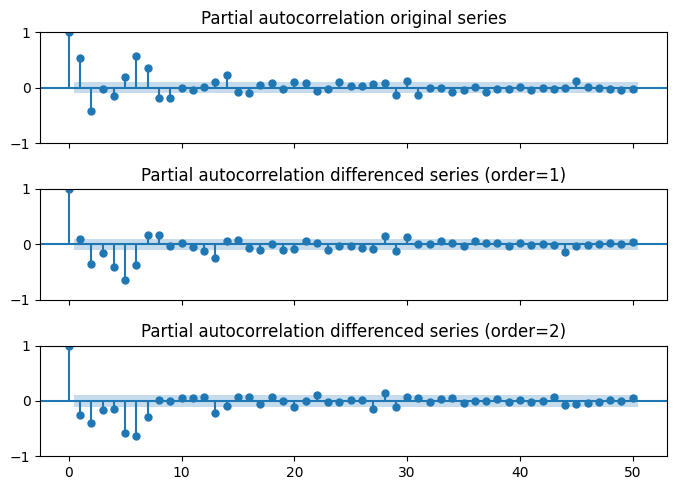

In [213]:
from matplotlib.pyplot import tight_layout

fig, axs = subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)
plot_pacf(data, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Partial autocorrelation original series')
plot_pacf(data_diff1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Partial autocorrelation differenced series (order=1)')
plot_pacf(data_diff2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Partial autocorrelation differenced series (order=2)')
tight_layout()

Text(0.5, 0.98, 'Time serie decomposition original series versus differenced series')

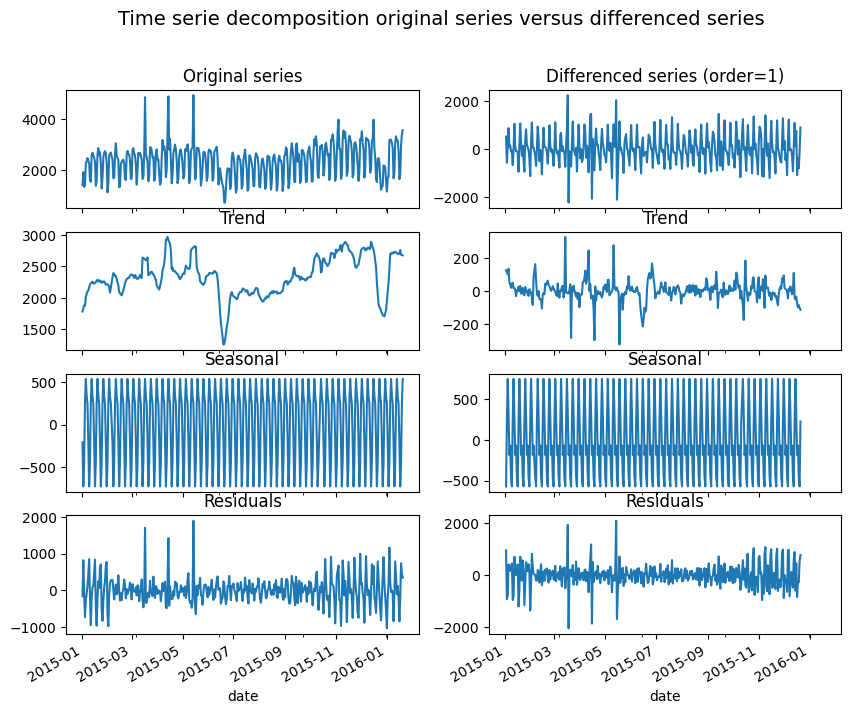

In [221]:
from matplotlib.pyplot import suptitle
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series descoposition of original versus differenced series
# ==============================================================================
res_decompose = seasonal_decompose(df2, model='additive', extrapolate_trend='freq', period=7)
res_descompose_diff_2 = seasonal_decompose(data_diff1, model='additive', extrapolate_trend='freq', period=7)

fig, axs = subplots(nrows=4, ncols=2, figsize=(10, 8), sharex=True)

res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Original series')
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Trend')
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Seasonal')
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuals')
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Differenced series (order=1)')
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Trend')
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Seasonal')
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuals')
suptitle('Time serie decomposition original series versus differenced series', fontsize=14)

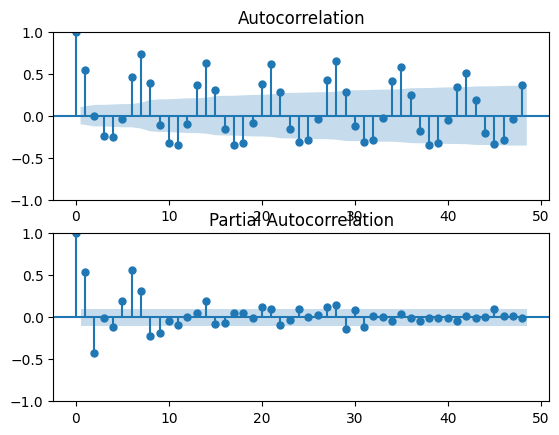

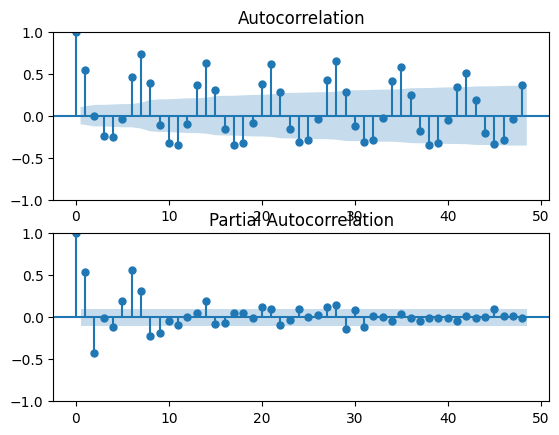

In [225]:
from matplotlib.pyplot import subplot
ax = subplot(211)
plot_acf(df2[13:].values.squeeze(), lags=48, ax=ax)

ax = subplot(212)
plot_pacf(df2[13:].values.squeeze(), lags=48, ax=ax)

In [226]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [227]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)


384

In [242]:
df2 = df[["date", "count"]]
df2.columns = ["ds", "y"]
df2.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [237]:
pip install --upgrade jupyter

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 256.6/256.6 kB 606.7 kB/s eta 0:00:00
     ---------------------------------------- 4.0/4.0 MB 802.8 kB/s eta 0:00:00
     ------------------------------------ 123.4/123.4 kB 725.3 kB/s eta 0:00:00
     -------------------------------------- 48.0/48.0 kB 401.3 kB/s eta 0:00:00
     -------------------------------------- 77.6/77.6 kB 716.5 kB/s eta 0:00:00
     ------------------------------------ 162.8/162.8 kB 649.0 kB/s eta 0:00:00
     ------------------------------------ 133.1/133.1 kB 787.6 kB/s eta 0:00:00
     -------------------------------------- 143.0/143.0 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 640.9 kB/s eta 0:00:00
     ------------------------------------ 380.2/380.2 kB 946.2 kB/s eta 0:00:00
     ---------------------------------------- 58.9/58.9 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 93.5/93.5 kB 2.7 MB/s eta 0:00:00
     -----------------------------------

In [244]:
%%time
import warnings

from tqdm.notebook import tqdm

results1 = []
best_aic = float("inf")
warnings.filterwarnings("ignore")

for param in (parameters_list):
    # try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model = SARIMAX(
            df2[:-30]["y"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            # train the model as is even if that would lead to a non-stationary / non-invertible model
            # see https://github.com/statsmodels/statsmodels/issues/6225 for details
        ).fit(disp=-1)
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    # save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

CPU times: total: 9min 48s
Wall time: 7min 51s


In [258]:
res = pd.DataFrame(results1)

In [259]:
res

,0,1
0,"(0, 0, 0, 0, 0, 0)",6505.860336
1,"(0, 0, 0, 0, 0, 1)",6137.441151
2,"(0, 0, 0, 0, 1, 0)",5192.923059
3,"(0, 0, 0, 0, 1, 1)",5109.772983
4,"(0, 0, 0, 0, 2, 0)",5430.392711
...,...,...
377,"(1, 1, 3, 3, 0, 1)",149.520981
378,"(1, 1, 3, 3, 1, 0)",5024.247726
379,"(1, 1, 3, 3, 1, 1)",5025.268824
380,"(1, 1, 3, 3, 2, 0)",5060.634034


In [262]:
res.columns = ["param", "aic"]

In [265]:
res = res.sort_values(by="aic", ascending=True)
res #(ps, ds, qs, Ps, Ds, Qs)

,param,aic
345,"(1, 1, 2, 1, 2, 1)",12.000000
377,"(1, 1, 3, 3, 0, 1)",149.520981
83,"(0, 0, 3, 2, 0, 1)",2470.887032
165,"(0, 1, 2, 3, 2, 1)",4961.632628
333,"(1, 1, 1, 3, 2, 1)",4962.829238
...,...,...
25,"(0, 0, 1, 0, 0, 1)",5895.946371
89,"(0, 0, 3, 3, 0, 1)",5963.508420
24,"(0, 0, 1, 0, 0, 0)",6114.489104
1,"(0, 0, 0, 0, 0, 1)",6137.441151


In [282]:
best_model = SARIMAX(df2["y"], order = (1, 0, 2), seasonal_order = (3, 2, 1, 7), enforce_invertibility=False, enforce_stationarity=False).fit(disp=-1)

In [283]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  383
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -2537.452
Date:                             Tue, 19 Dec 2023   AIC                           5090.904
Time:                                     22:45:16   BIC                           5121.699
Sample:                                          0   HQIC                          5103.166
                                             - 383                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8510      0.057     14.906      0.000       0.739       0.963
ma.L1         -0.3523      

<Axes: >

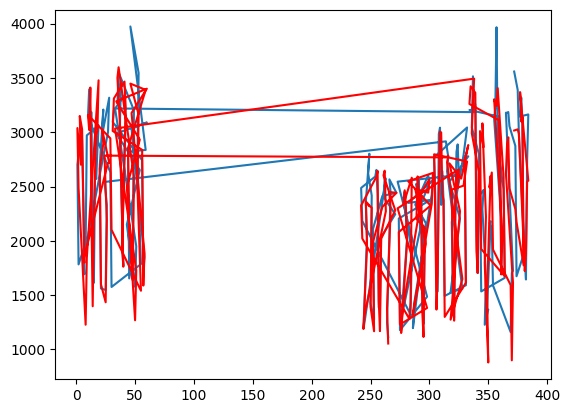

In [284]:
def invboxcox(y, lmbda):
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lmbda * y + 1) / lmbda)

df2["train_arima"] = best_model.fittedvalues
df2.y.tail(200).plot()
df2.train_arima.tail(200).plot(color="r")
# ylabel("wiki pageviews")

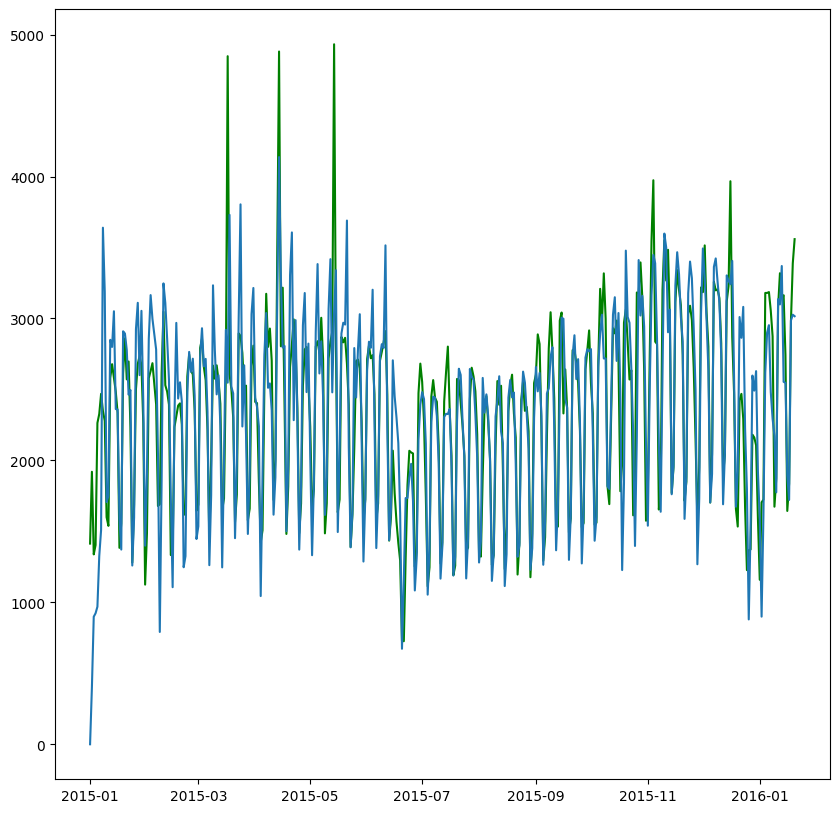

In [285]:
fig = figure(figsize=(10, 10))
plot(df2.ds, df2.y, color= 'green')
plot(df2.ds, df2.train_arima)

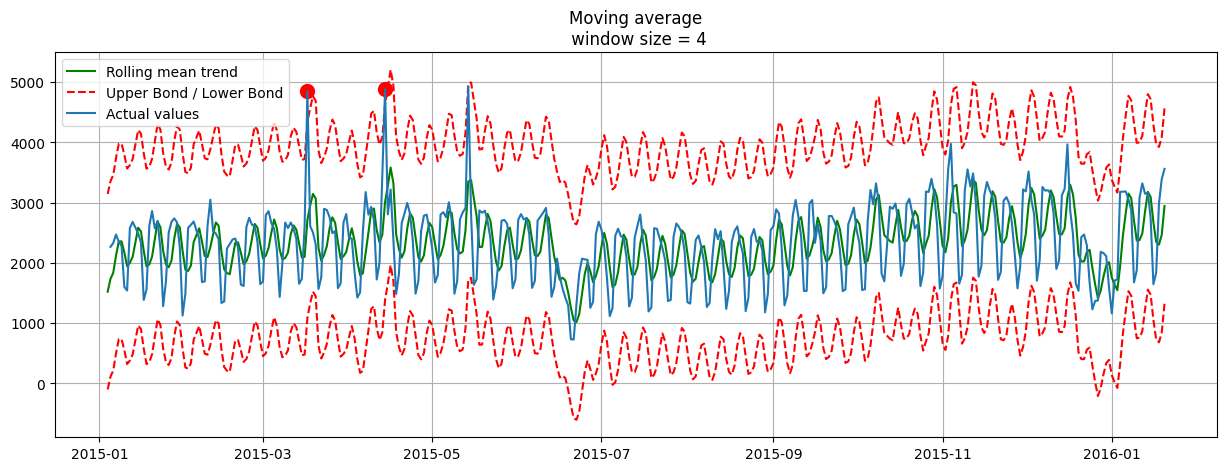

In [289]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
df3 = df.set_index("date")[["count"]]

def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    figure(figsize=(15, 5))
    title("Moving average\n window size = {}".format(window))
    plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plot(anomalies, "ro", markersize=10)

    plot(series[window:], label="Actual values")
    legend(loc="upper left")
    grid(True)

plotMovingAverage(df3, 4, plot_intervals=True, plot_anomalies=True)

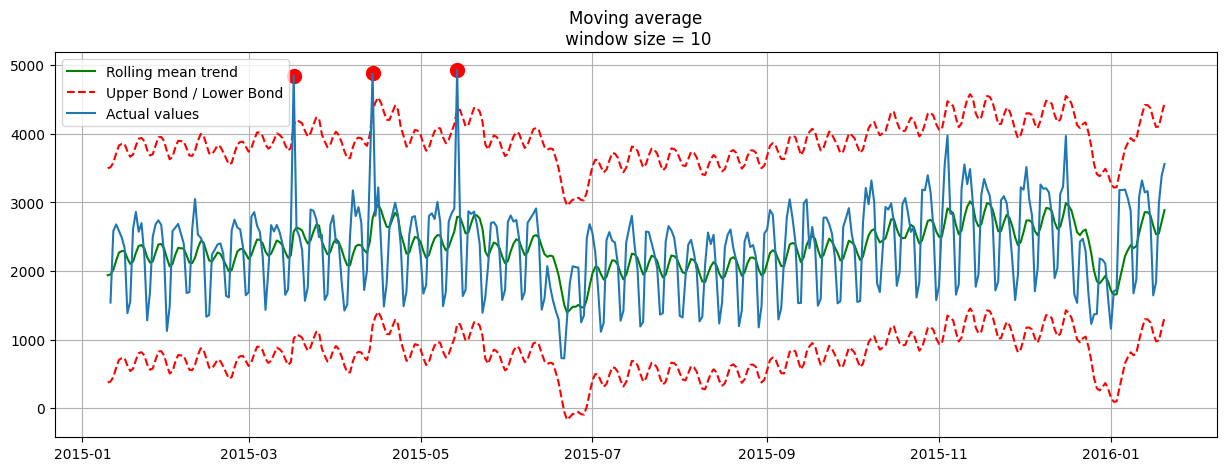

In [290]:
plotMovingAverage(df3, 10, plot_intervals=True, plot_anomalies=True)

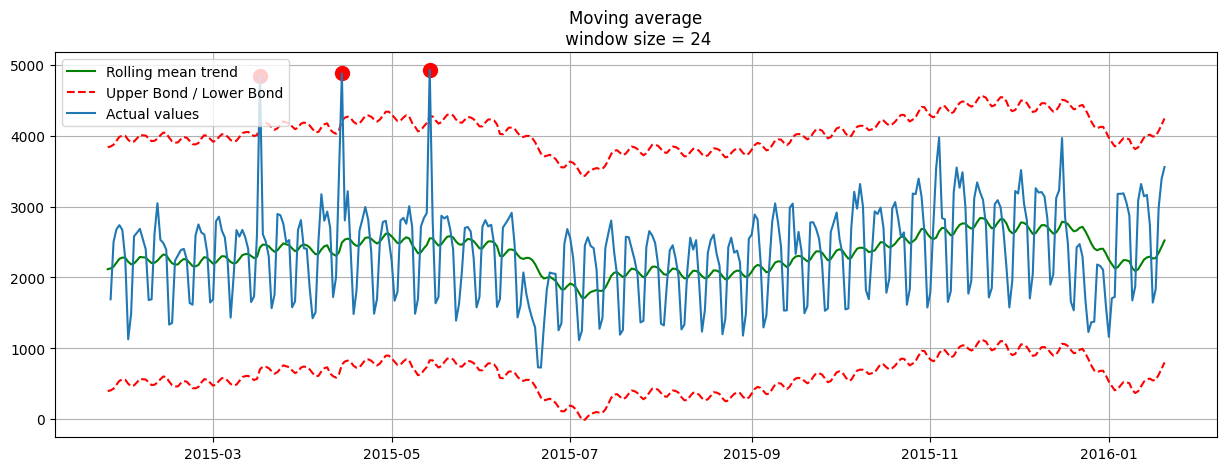

In [313]:
plotMovingAverage(df3,24, plot_intervals=True, plot_anomalies=True)

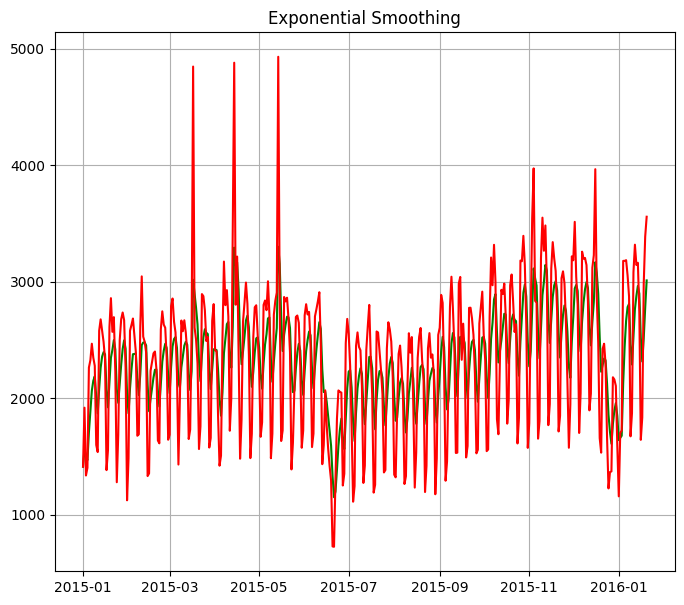

In [323]:
from matplotlib.pyplot import axis, style 

def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

def plotExponentialSmoothing(series, alpha):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    # with style.context("seaborn"):
    fig = figure(figsize=(8, 7))
    plot(
        series.index, exponential_smoothing(series, alpha), color="green"
    )
    plot(series.index, series.values, "c", label="Actual", color = "r")
    # legend(loc="best")
    axis("tight")
    title("Exponential Smoothing")
    grid(True)

plotExponentialSmoothing(df3["count"], 0.3)

In [318]:
df3

,count
date,
2015-01-01,1414
2015-01-02,1920
2015-01-03,1338
2015-01-04,1404
2015-01-05,2264
...,...
2016-01-16,1644
2016-01-17,1836
2016-01-18,2983


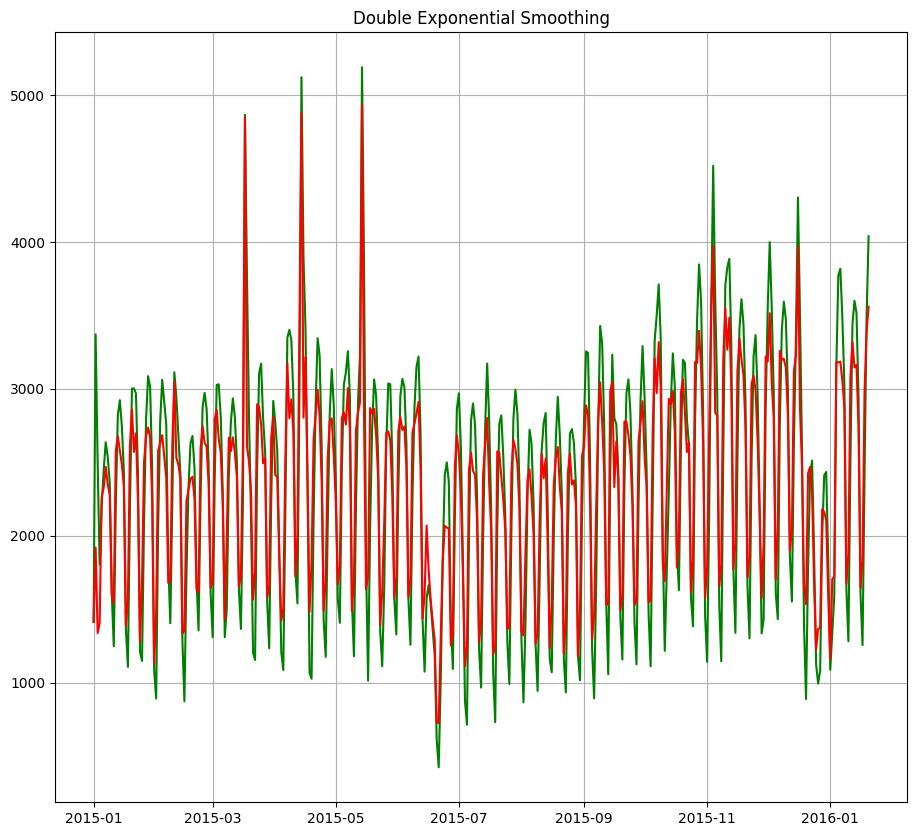

In [331]:
def double_exponential_smoothing(series, alpha, betta):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]]  # first value is same as series
    al = [series[0] for i in range(len(series))]
    b = [series[0] for i in range(len(series))]
    for n in range(1, len(series)):
        al[n] = (alpha * series[n] + (1 - alpha) * (al[n - 1] + b[n - 1]))
        b[n] = betta * (al[n] - al[n - 1]) + (1 - betta) * b[n - 1]
        result.append(al[n] + b[n])
    return result

def plotExponentialSmoothing2(series, alpha, betta):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    # with style.context("seaborn"):
    fig = figure(figsize=(11, 10))
    plot(
        series.index, double_exponential_smoothing(series, alpha, betta), color="green"
    )
    plot(series.index, series.values, "c", label="Actual", color = "r")
    # legend(loc="best")
    axis("tight")
    title("Double Exponential Smoothing")
    grid(True)

plotExponentialSmoothing2(df3["count"], 0.6, 0.6)